# **CUSTOMER SEGMENTATION_DS CAPSTONE PROJECT**

# Problem Statement

- It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
- Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
- Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value).


# Dataset Description

This is a transnational data set which contains all the transactions that occurred between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail. The company mainly sells unique and all-occasion gifts.

|Variables     |	Description    |
|:--------------:|:-------------------:|
|InvoiceNo|Invoice number|
|StockCode|Product (item) code|
|Description|Product (item) name|
|Quantity|The quantities of each product (item) per transaction|
|InvoiceDate|Invoice Date and time|
|UnitPrice|Unit price|
|CustomerID|Customer number|
|Country|Country name|

## Importing Python libraries 

In [1]:
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
import seaborn as sns

from pandas_profiling import ProfileReport
import missingno as msmo
import squarify
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_excel('Online Retail.xlsx')

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

## Project Task: Week 1
### Data Cleaning:

1. Perform a preliminary data inspection and data cleaning.

    a. Check for missing data and formulate an apt strategy to treat them.

    b. Remove duplicate data records.

    c. Perform descriptive analytics on the given data.

### Data Transformation:

2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

    a. Create month cohorts and analyze active customers for each cohort.

    b. Analyze the retention rate of customers.

### Data Cleaning

<span style='background :yellow' > Descriptive Analytics using Pandas Profiling </span>

In [7]:
report= ProfileReport(df)

In [6]:
report

In [8]:
#Saving Pandas Profiling Data Analysis Report

report.to_file("EDA_of_retail_dataset.html")

<span style='background :yellow' > Missing value Analysis using Missingno </span>

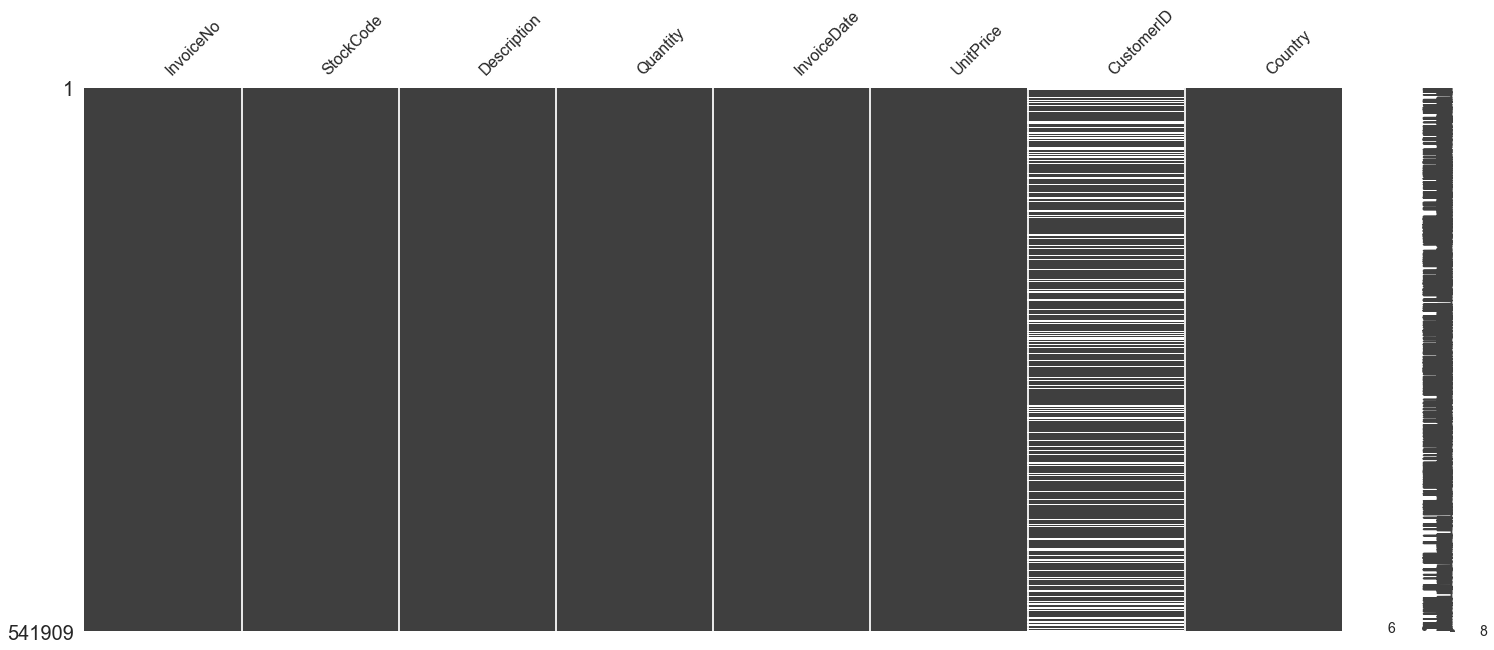

In [9]:
msmo.matrix(df)

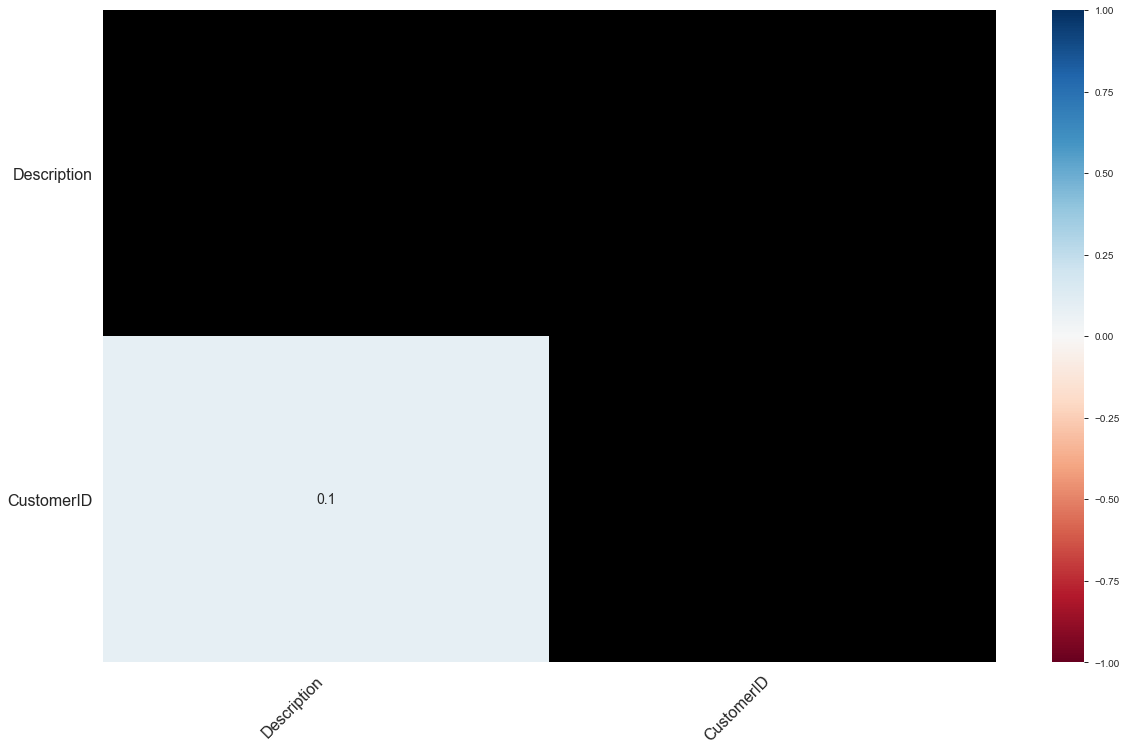

In [10]:
msmo.heatmap(df)

<span style='background :yellow' >Check for missing data and formulate an apt strategy to treat them. </span>

In [11]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [12]:
df= df.dropna()

In [13]:
df.shape

(406829, 8)

According to the above analysis, CustomerId column has 25% missing data, so we will drop those.

<span style='background :yellow' > Remove duplicate data records.</span>

In [14]:
df.duplicated().sum()

5225

In [15]:
df.drop_duplicates(keep='first',inplace=True)

/Users/asfiya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
df.shape

(401604, 8)

From the above, there are 5225 duplicate rows, so we remove them too.

### Data Transformation:

Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

In [18]:
retail=df.copy()

In [19]:
retail['Revenue'] = retail['Quantity'] * retail['UnitPrice']

In [20]:
retail.InvoiceDate = pd.to_datetime(retail['InvoiceDate'], format='%d-%m-%Y %H:%M')

In [21]:
retail_month = retail[retail.InvoiceDate.dt.year==2011]
monthly_gross = retail_month.groupby(retail_month.InvoiceDate.dt.month).Revenue.sum()

In [22]:
retail_month

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
42481,539993,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00,1.95,13313.0,United Kingdom,19.50
42482,539993,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50
42483,539993,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00,0.42,13313.0,United Kingdom,10.50
42484,539993,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00,2.10,13313.0,United Kingdom,10.50
42485,539993,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00,1.25,13313.0,United Kingdom,12.50
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60


In [23]:
monthly_gross

InvoiceDate
1      473731.900
2      435534.070
3      578576.210
4      425222.671
5      647011.670
6      606862.520
7      573112.321
8      615078.090
9      929356.232
10     973306.380
11    1126815.070
12     341539.430
Name: Revenue, dtype: float64

<span style='background :yellow' > Let's visualize the top grossing months.</span>

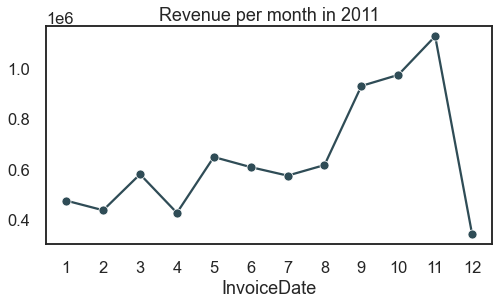

In [24]:
plt.figure(figsize=(8,4))
sns.set_context("talk")
sns.set_palette("PuBuGn_d")
sns.lineplot(x=monthly_gross.index,y=monthly_gross.values, marker='o')
plt.xticks(range(1,13))
plt.title("Revenue per month in 2011")
plt.show()

From the above graph, the months of September,October and November have the highest revenue. 

<span style='background :yellow' > Amount of transactions per month.</span>

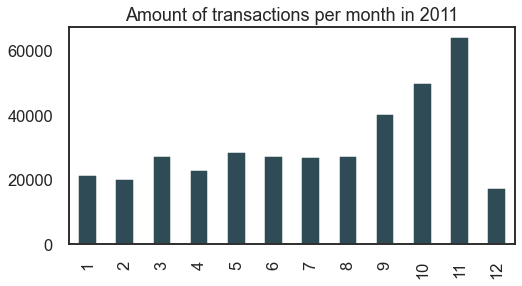

In [25]:
plt.figure(figsize=(8,4))
retail[retail.InvoiceDate.dt.year==2011].InvoiceDate.dt.month.value_counts(sort=False).plot(kind='bar')
plt.title("Amount of transactions per month in 2011")
plt.show()

<span style='background :yellow' >Let's visualize some top products from the whole range.</span>

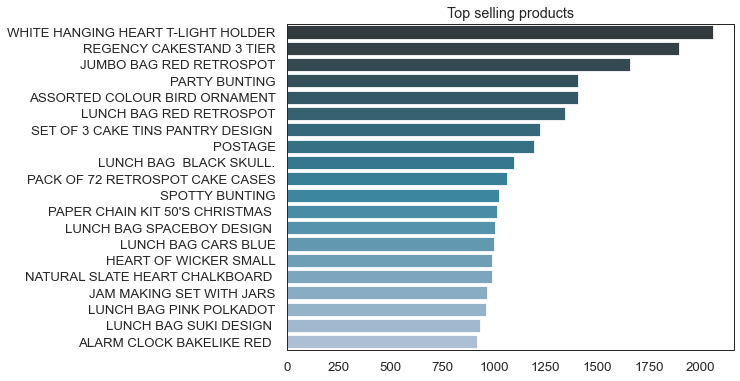

<Figure size 432x288 with 0 Axes>

In [26]:
top_products = retail['Description'].value_counts()[:20]
plt.figure(figsize=(8,6))
sns.set_context("paper", font_scale=1.5)
sns.barplot(y = top_products.index,
            x = top_products.values, 
           palette='PuBuGn_d')
plt.title("Top selling products")
plt.show()
plt.savefig('top_products.png')

<span style='background :yellow' >Create month cohorts and analyze active customers for each cohort.</span>

In [27]:
#Assign acquisition month cohort to each customer
#creating invoice month column to see first month when customer purchased 
retail['InvoiceMonth'] = retail['InvoiceDate'].apply(lambda x: dt.datetime(x.year, x.month, 1))

In [28]:
grouping = retail.groupby('CustomerID')['InvoiceMonth']
#assign smallest invoice value to each customer
retail['CohortMonth'] = grouping.transform('min')
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01


In [29]:
retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011-12-01,2011-08-01
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011-12-01,2011-08-01
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011-12-01,2011-08-01
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,2011-12-01,2011-08-01


In [30]:
#function to extract year, month, day as integers
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [31]:
#extract month
invoice_year, invoice_month, _ = get_date_int(retail, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(retail, 'CohortMonth')

In [32]:
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month

In [33]:
# Extract the difference in days from all previous values
retail['CohortIndex'] = years_diff * 12 + months_diff + 1
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1


In [34]:
#count monthly active customers from each cohort
grouping = retail.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['CustomerID'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns = 'CohortIndex', values='CustomerID')

<span style='background :yellow' >Analyze the retention rate of customers.</span>

In [35]:
#Customer retention
cohort_sizes = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_sizes, axis=0)
retention = retention.round(3) * 100
retention.head(20)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,38.2,33.4,38.7,36.0,39.7,38.0,35.4,35.4,39.5,37.3,50.0,27.4
2011-01-01,100.0,24.0,28.3,24.2,32.8,29.9,26.1,25.7,31.1,34.7,36.8,15.0,NaN
2011-02-01,100.0,24.7,19.2,27.9,26.8,24.7,25.5,28.2,25.8,31.3,9.2,NaN,NaN
2011-03-01,100.0,19.1,25.5,21.8,23.2,17.7,26.4,23.9,28.9,8.9,NaN,NaN,NaN
2011-04-01,100.0,22.7,22.1,21.1,20.7,23.7,23.1,26.1,8.4,NaN,NaN,NaN,NaN
2011-05-01,100.0,23.7,17.2,17.2,21.5,24.4,26.5,10.4,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,20.9,18.7,27.2,24.7,33.6,10.2,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,20.9,20.4,23.0,27.2,11.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,25.1,25.1,25.1,13.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


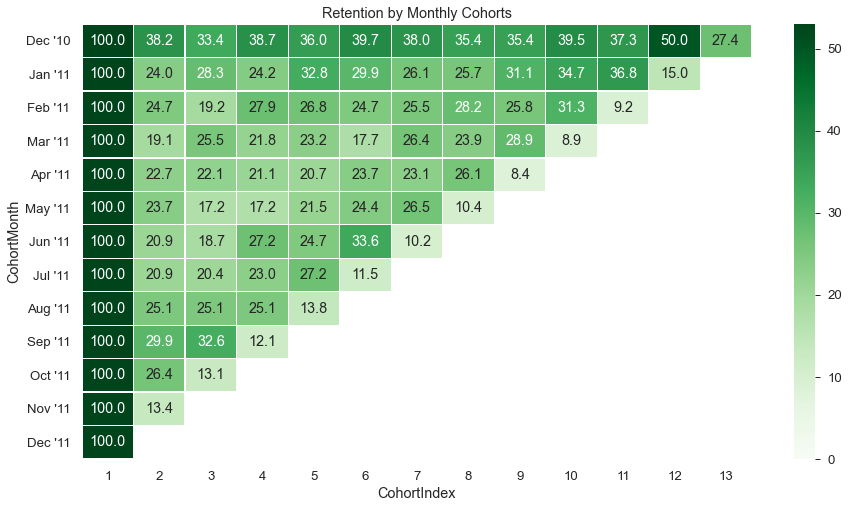

In [36]:
month_list = ["Dec '10", "Jan '11", "Feb '11", "Mar '11", "Apr '11",\
              "May '11", "Jun '11", "Jul '11", "Aug '11", "Sep '11", \
              "Oct '11", "Nov '11", "Dec '11"]

plt.figure(figsize=(15,8))
plt.title('Retention by Monthly Cohorts')
sns.heatmap(data=retention,
            annot = True,
            cmap = "Greens",
            vmin = 0.0,
            vmax = list(retention.max().sort_values(ascending = False))[1]+3,
            fmt = '.1f',
            linewidth = 0.3,
            yticklabels=month_list)

plt.show()


## Project Task: Week 2
### Data Modeling :

1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

2. Calculate RFM metrics.

3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.

    b1. Combine three ratings to get a RFM segment (as strings).

    b2. Get the RFM score by adding up the three ratings.

    b3. Analyze the RFM segments by summarizing them and comment on the findings.

Note: Rate “recency" for customer who has been active more recently higher than the less recent customer, because each company wants its customers to be recent.

Note: Rate “frequency" and “monetary" higher, because the company wants the customer to visit more often and spend more money

#### RFM Model Building
Build a RFM (Recency Frequency Monetary) model. 
- Recency means the number of days since a customer made the last purchase.
- Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. 
- Monetary is the total amount of money a customer spent in that given period. 


In [37]:
#12 months of data
print('Min:{}; Max:{}'.format(min(retail.InvoiceDate), max(retail.InvoiceDate)))

Min:2010-12-01 08:26:00; Max:2011-12-09 12:50:00


In [38]:
#calculate revenue per row and add new column
retail['MonetaryValue'] = retail['Quantity'] * retail['UnitPrice']

In [39]:
#let's look at amount spend per customer (revenue contributed) M-Monetary
retail_mv = retail.groupby(['CustomerID']).agg({'MonetaryValue': sum}).reset_index()
retail_mv.head()

,CustomerID,MonetaryValue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [40]:
#F-frequency (how many purchases each customer made)
retail_f = retail.groupby('CustomerID')['InvoiceNo'].count()
retail_f = retail_f.reset_index()
retail_f.head()

,CustomerID,InvoiceNo
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [41]:
#merge previous dataframes together (mv+f)
retail_mv_f = pd.merge(retail_mv, retail_f, on='CustomerID', how='inner')
retail_mv_f.head()

,CustomerID,MonetaryValue,InvoiceNo
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [42]:
#R-recency 
#last transaction date 

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d-%m-%Y %H:%M')
max_date = max(retail['InvoiceDate'])

#difference between last date and transaction date
retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceMonth,CohortMonth,CohortIndex,MonetaryValue,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,2010-12-01,1,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12-01,2010-12-01,1,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12-01,2010-12-01,1,20.34,373 days 04:24:00


In [43]:
#recency per customer (last transaction date)
retail_r = retail.groupby('CustomerID')['Diff'].min()
retail_r = retail_r.reset_index()

# Extract number of days only
retail_r['Diff'] = retail_r['Diff'].dt.days
retail_r.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [44]:
#merge R dataframe with FM

retail_rfm = pd.merge(retail_mv_f, retail_r, on='CustomerID', how='inner')
retail_rfm.columns = ['CustomerID', 'MonetaryValue', 'Frequency', 'Recency']
retail_rfm.head()

,CustomerID,MonetaryValue,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [45]:
cols = retail_rfm.columns.tolist()
cols

['CustomerID', 'MonetaryValue', 'Frequency', 'Recency']

In [46]:
#changed columns order
cols = ['CustomerID', 'Recency', 'Frequency', 'MonetaryValue']
retail_rfm = retail_rfm[cols]
retail_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,2,0.00
1,12347.0,1,182,4310.00
2,12348.0,74,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,309,17,334.40


<span style='background :yellow' >Calculate RFM metrics.</span>

In [47]:
# create labels and assign them to tree percentile groups 
r_labels = range(4, 0, -1)
r_groups = pd.qcut(retail_rfm.Recency, q = 4, labels = r_labels)
f_labels = range(1, 5)
f_groups = pd.qcut(retail_rfm.Frequency, q = 4, labels = f_labels)
m_labels = range(1, 5)
m_groups = pd.qcut(retail_rfm.MonetaryValue, q = 4, labels = m_labels)

In [48]:
# make a new column for group labels
retail_rfm['R'] = r_groups.values
retail_rfm['F'] = f_groups.values
retail_rfm['M'] = m_groups.values
# sum up the three columns
retail_rfm['RFM_Segment'] = retail_rfm.apply(lambda x: str(x['R']) + str(x['F']) + str(x['M']), axis = 1)
retail_rfm['RFM_Score'] = retail_rfm[['R', 'F', 'M']].sum(axis = 1)
retail_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
0,12346.0,325,2,0.00,1,1,1,111,3.0
1,12347.0,1,182,4310.00,4,4,4,444,12.0
2,12348.0,74,31,1797.24,2,2,4,224,8.0
3,12349.0,18,73,1757.55,3,3,4,334,10.0
4,12350.0,309,17,334.40,1,1,2,112,4.0


In [49]:
# assign labels from total score
score_labels = ['Green', 'Bronze', 'Silver', 'Gold']
score_groups = pd.qcut(retail_rfm.RFM_Score, q = 4, labels = score_labels)
retail_rfm['RFM_Level'] = score_groups.values
retail_rfm.sort_values(by='RFM_Score', ascending=False)
retail_rfm.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level
0,12346.0,325,2,0.00,1,1,1,111,3.0,Green
1,12347.0,1,182,4310.00,4,4,4,444,12.0,Gold
2,12348.0,74,31,1797.24,2,2,4,224,8.0,Silver
3,12349.0,18,73,1757.55,3,3,4,334,10.0,Silver
4,12350.0,309,17,334.40,1,1,2,112,4.0,Green
5,12352.0,35,95,1545.41,3,3,3,333,9.0,Silver
6,12353.0,203,4,89.00,1,1,1,111,3.0,Green
7,12354.0,231,58,1079.40,1,3,3,133,7.0,Bronze
8,12355.0,213,13,459.40,1,1,2,112,4.0,Green
9,12356.0,22,59,2811.43,3,3,4,334,10.0,Silver


In [50]:
retail_rfm_levels = retail_rfm.groupby('RFM_Level')['CustomerID'].count().reset_index(name='counts')
retail_rfm_levels.head()

,RFM_Level,counts
0,Green,1298
1,Bronze,908
2,Silver,1322
3,Gold,844


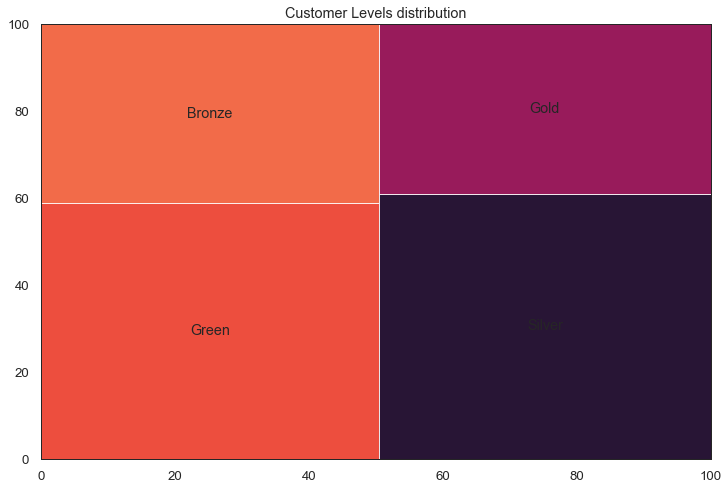

In [51]:
import squarify
#let's exclude others segment for visualization
levels = list(retail_rfm_levels.RFM_Level)
score = list(retail_rfm_levels.counts)
plt.figure(figsize=(12,8))
plt.title('Customer Levels distribution')
squarify.plot(sizes=score, label=levels)

plt.show()

<span style='background :yellow' >Analyze the RFM segments by summarizing them and comment on the findings.</span>

In [52]:
#let's try to do more detailed segmentation
segment_dict = {    
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Potential Loyalists':'434', # High recency and monetary value, average frequency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'At Risk Customers':'244',   # Customer's shopping less often now who used to shop a lot
    'Can’t Lose Them':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [53]:
# Swap the key and value of dictionary
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

# Allocate segments to each customer as per the RFM score mapping
retail_rfm['Segment'] = retail_rfm.RFM_Segment.map(lambda x: dict_segment.get(x))

In [54]:
# Allocate all remaining customers to others segment category
retail_rfm.Segment.fillna('others', inplace=True)

In [55]:
retail_rfm.sample(10)

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level,Segment
793,13391.0,203,1,59.80,1,1,1,111,3.0,Green,others
1883,14895.0,7,506,11020.26,4,4,4,444,12.0,Gold,Best Customers
1278,14064.0,28,79,1168.92,3,3,3,333,9.0,Silver,others
3958,17716.0,22,254,5505.79,3,4,4,344,11.0,Gold,Loyal Customers
3533,17133.0,15,27,4892.24,4,2,4,424,10.0,Silver,others
388,12833.0,144,24,417.38,1,2,2,122,5.0,Green,Lost Cheap Customers
903,13544.0,39,78,276.06,3,3,1,331,7.0,Bronze,others
2538,15773.0,5,10,635.68,4,1,2,412,7.0,Bronze,others
905,13548.0,95,123,678.16,2,4,3,243,9.0,Silver,others
2743,16057.0,3,134,2140.22,4,4,4,444,12.0,Gold,Best Customers


In [56]:
retail_rfm_segments = retail_rfm[retail_rfm.Segment!='other'].groupby('Segment')['CustomerID'].count().reset_index(name='counts')
retail_rfm_segments.iloc[:8]

,Segment,counts
0,At Risk Customers,105
1,Best Customers,470
2,Big Spenders,57
3,Can’t Lose Them,21
4,Lost Cheap Customers,204
5,Loyal Customers,210
6,Potential Loyalists,79
7,Recent Customers,85


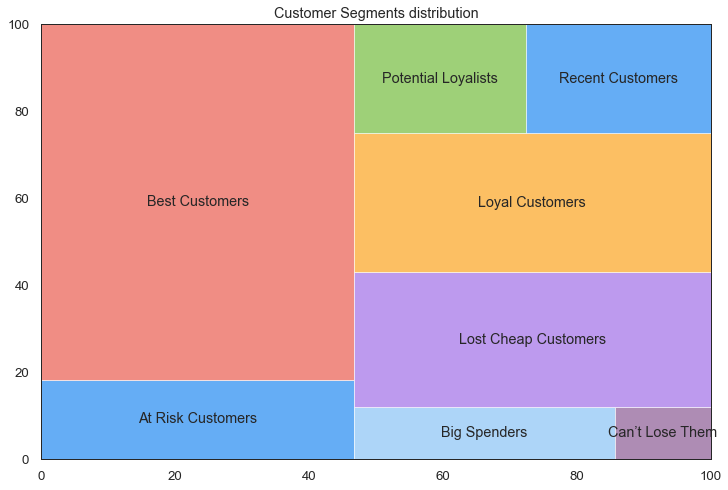

In [57]:
#let's exclude others segment for visualization
segment = list(retail_rfm_segments.iloc[:8].Segment)
score = list(retail_rfm_segments.iloc[:8].counts)
color_list = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
plt.figure(figsize=(12,8))
plt.title('Customer Segments distribution')
squarify.plot(sizes=score, label=segment,color=color_list, alpha=0.7)

plt.show()

## Project Task: Week 3
### Data Modeling :

1. Create clusters using k-means clustering algorithm.

    a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

    b. Decide the optimum number of clusters to be formed.

    c. Analyze these clusters and comment on the results.

There are 2 types of outliers and we will treat outliers as it can skew our dataset

    1.Statistical

    2.Domain specific

Text(0.5, 0, 'Attributes')

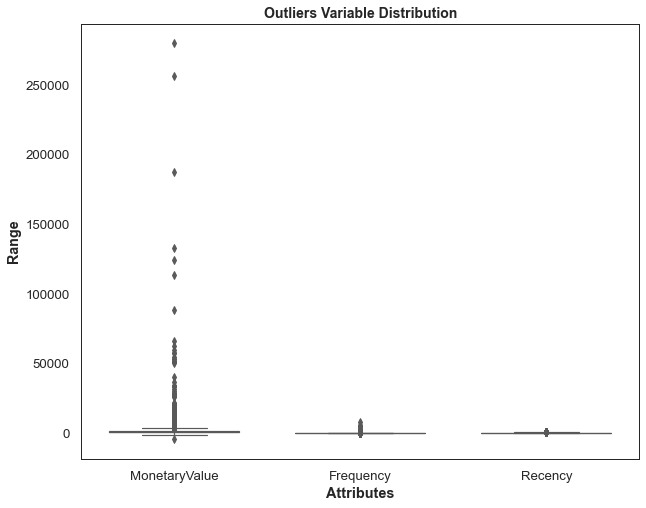

In [58]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['MonetaryValue','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = retail_rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [59]:
# Removing (statistical) outliers for Amount
Q1 = retail_rfm.MonetaryValue.quantile(0.05)
Q3 = retail_rfm.MonetaryValue.quantile(0.95)
IQR = Q3 - Q1
retail_rfm = retail_rfm[(retail_rfm.MonetaryValue >= Q1 - 1.5*IQR) & (retail_rfm.MonetaryValue <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = retail_rfm.Recency.quantile(0.05)
Q3 = retail_rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
retail_rfm = retail_rfm[(retail_rfm.Recency >= Q1 - 1.5*IQR) & (retail_rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = retail_rfm.Frequency.quantile(0.05)
Q3 = retail_rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
retail_rfm = retail_rfm[(retail_rfm.Frequency >= Q1 - 1.5*IQR) & (retail_rfm.Frequency <= Q3 + 1.5*IQR)]

#### Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.| 

There are two common ways of rescaling:

    1.Min-Max scaling
    2.Standardisation (mean-0, sigma-1)

Here, we will use Standardisation Scaling.

In [60]:
# Rescaling the attributes

rfm_df = retail_rfm[['MonetaryValue', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4295, 3)

In [61]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['MonetaryValue', 'Frequency', 'Recency']
rfm_df_scaled.head()

,MonetaryValue,Frequency,Recency
0,-0.722542,-0.750830,2.302166
1,1.735232,1.057112,-0.906150
2,0.302333,-0.459551,-0.183289
3,0.279700,-0.037698,-0.737813
4,-0.531850,-0.600168,2.143731


##### K-Means Clustering

K-means clustering is one of the most widely used unsupervised machine learning algorithms that forms clusters of data based on the similarity between data instances. For this particular algorithm to work, the number of clusters has to be defined beforehand. The K in the K-means refers to the number of clusters.

The K-means algorithm starts by randomly choosing a centroid value for each cluster. 

After that the algorithm iteratively performs three steps: 
    
    1) Find the Euclidean distance between each data instance and centroids of all the clusters; 
    
    2) Assign the data instances to the cluster of the centroid with nearest distance; 
    
    3) Calculate new centroid values based on the mean values of the coordinates of all the data instances from the corresponding cluster.
    
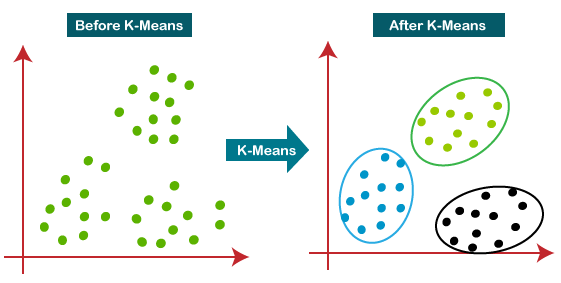

In [62]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [63]:
kmeans.labels_

array([0, 2, 1, ..., 1, 3, 1], dtype=int32)

##### Finding the Optimal Number of Clusters

Elbow Curve to get the right number of Clusters

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [64]:
#elbow method
from scipy.spatial.distance import cdist
clusters = range(1,10)
mean_dist =[]
for k in clusters:
    model = KMeans(n_clusters = k)
    model.fit(rfm_df_scaled)
    clusassign = model.predict(rfm_df_scaled)
    print (clusassign)
    mean_dist.append(sum(np.min(cdist(rfm_df_scaled,model.cluster_centers_,
                    'euclidean'),axis =1))/ rfm_df_scaled.shape[0])

[0 0 0 ... 0 0 0]
[0 1 0 ... 0 1 0]
[0 1 2 ... 2 1 2]
[2 3 0 ... 0 1 0]
[0 1 3 ... 3 4 3]
[3 1 2 ... 2 5 2]
[1 2 0 ... 0 6 3]
[2 3 4 ... 4 5 1]
[6 2 0 ... 0 7 3]


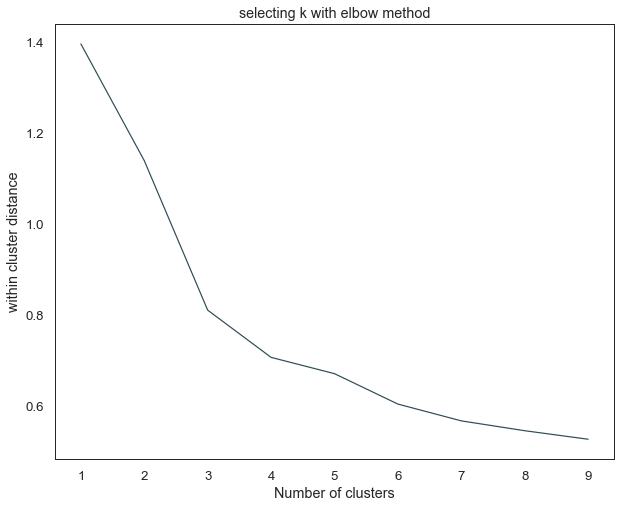

In [65]:
import matplotlib.pylab as plt
plt.plot(clusters,mean_dist)
plt.xlabel("Number of clusters")
plt.ylabel("within cluster distance")
plt.title("selecting k with elbow method")
plt.show()

In [66]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [67]:
 kmeans.labels_

array([1, 3, 0, ..., 0, 2, 0], dtype=int32)

In [68]:
# assign the label
retail_rfm['Cluster_Id'] = kmeans.labels_
retail_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level,Segment,Cluster_Id
0,12346.0,325,2,0.00,1,1,1,111,3.0,Green,others,1
1,12347.0,1,182,4310.00,4,4,4,444,12.0,Gold,Best Customers,3
2,12348.0,74,31,1797.24,2,2,4,224,8.0,Silver,others,0
3,12349.0,18,73,1757.55,3,3,4,334,10.0,Silver,Big Spenders,0
4,12350.0,309,17,334.40,1,1,2,112,4.0,Green,others,1


In [89]:
inertia=kmeans.inertia_
inertia

3344.4614119006287

In [91]:
retail_rfm['Inertia']=kmeans.inertia_

In [93]:
retail_rfm.head()

,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level,Segment,Cluster_Id,Cluster_Labels,Inertia
0,12346.0,325,2,0.00,1,1,1,111,3.0,Green,others,1,0,3344.461412
1,12347.0,1,182,4310.00,4,4,4,444,12.0,Gold,Best Customers,3,0,3344.461412
2,12348.0,74,31,1797.24,2,2,4,224,8.0,Silver,others,0,0,3344.461412
3,12349.0,18,73,1757.55,3,3,4,334,10.0,Silver,Big Spenders,0,0,3344.461412
4,12350.0,309,17,334.40,1,1,2,112,4.0,Green,others,1,0,3344.461412


In [95]:
retail_rfm.to_excel('retail_clusters.xlsx',index=False)

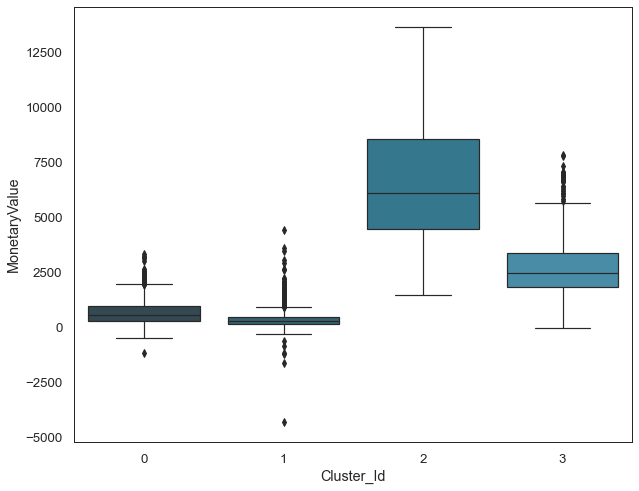

In [70]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='MonetaryValue', data=retail_rfm)

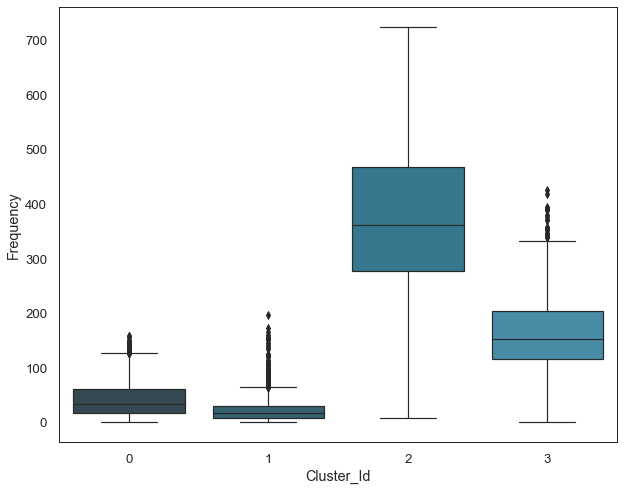

In [71]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=retail_rfm)

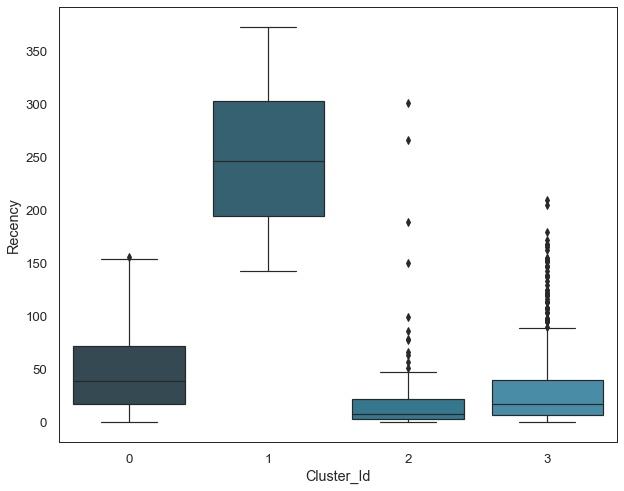

In [72]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=retail_rfm)

##### Hierarchical Clustering

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

    1)Divisive

    2)Agglomerative.




Single Linkage:

In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points. 

![single linkage](https://www.saedsayad.com/images/Clustering_single.png)

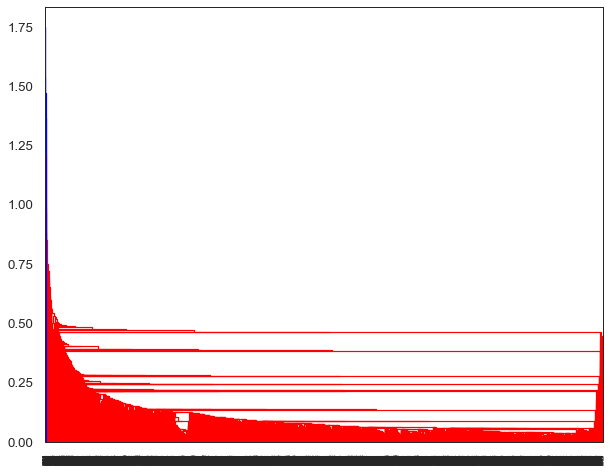

In [73]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

Complete Linkage

In complete linkage hierarchical clustering, the distance between two clusters is defined as the longest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two furthest points.

![complete linkage](https://www.saedsayad.com/images/Clustering_complete.png)

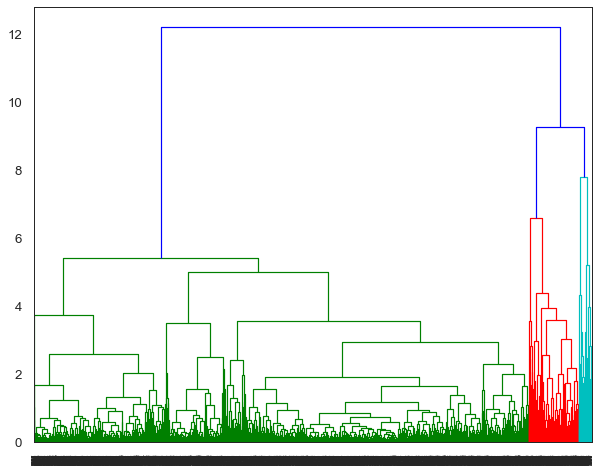

In [74]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

Average Linkage:

In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

![average linkage](https://www.saedsayad.com/images/Clustering_average.png)

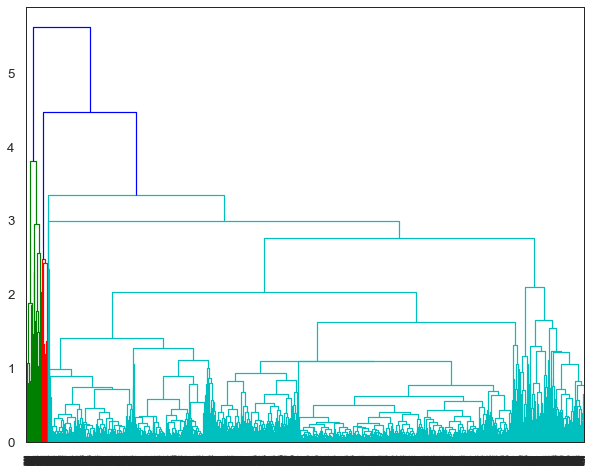

In [75]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [83]:
#Cutting the Dendrogram based on K
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 3, 0])

In [84]:
# Assign cluster labels

retail_rfm['Cluster_Labels'] = cluster_labels
retail_rfm.head()


,CustomerID,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,RFM_Level,Segment,Cluster_Id,Cluster_Labels
0,12346.0,325,2,0.00,1,1,1,111,3.0,Green,others,1,0
1,12347.0,1,182,4310.00,4,4,4,444,12.0,Gold,Best Customers,3,0
2,12348.0,74,31,1797.24,2,2,4,224,8.0,Silver,others,0,0
3,12349.0,18,73,1757.55,3,3,4,334,10.0,Silver,Big Spenders,0,0
4,12350.0,309,17,334.40,1,1,2,112,4.0,Green,others,1,0


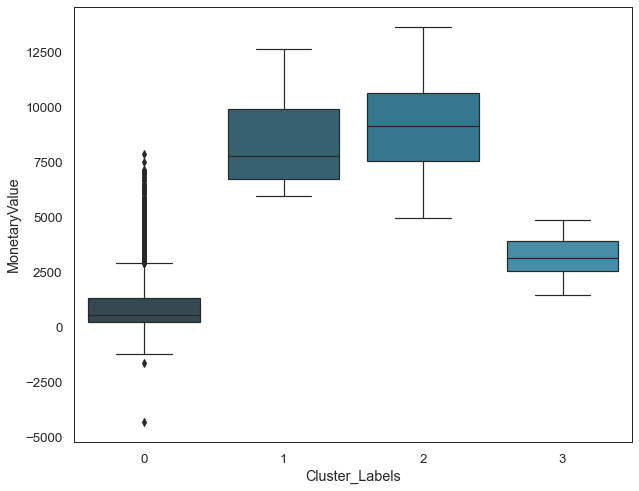

In [85]:
# Plot Cluster Label vs Amount

sns.boxplot(x='Cluster_Labels', y='MonetaryValue', data=retail_rfm)

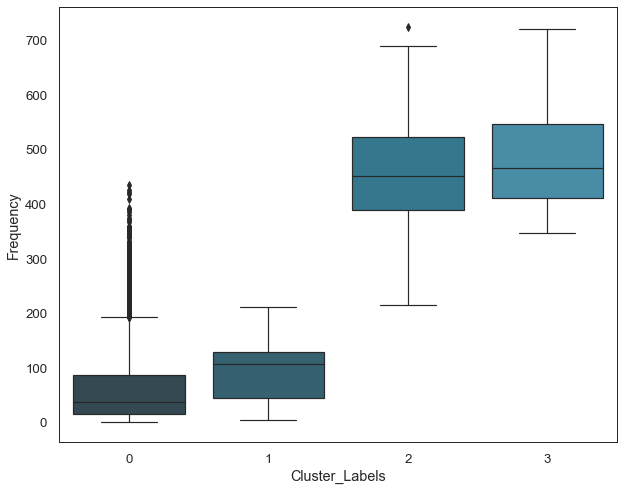

In [86]:
# Plot Cluster Label vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=retail_rfm)

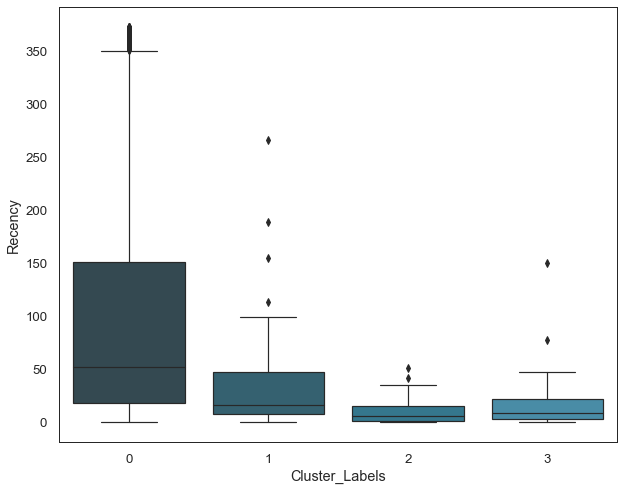

In [87]:
# Plot Cluster Label vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=retail_rfm)

## Final Analysis

Inference:

#### K-Means Clustering with 4 Cluster Ids

- Customers with Cluster Id 0 are the customers who have visited long time back with less spending and less frequented customers.
- Customers with Cluster Id 1 are average customers with mediocre monteray value but not visited much.
- Customers with Cluster Id 2 are good buyers.
- Customers with Cluster Id 3 are high valued customers with high frequency and monetary value and have visited recently.

#### Hierarchical Clustering with 4 Cluster Labels

- Customers with Cluster_Labels 3 are the customers who have frequented the most and recently visited with average spendings.
- Customers with Cluster_Labels 2 are frequent buyers with more spendings and visited most recently.
- Customers with Cluster_Labels 1 are the ones who spend a lot but haven't frequented much.
- Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

## Project Task: Week 4
#### Data Reporting:

1. Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

    a. Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures

    b. Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold

    c. Bar graph to show the count of orders vs. hours throughout the day

    d. Plot the distribution of RFM values using histogram and frequency charts

    e. Plot error (cost) vs. number of clusters selected

    f. Visualize to compare the RFM values of the clusters using heatmap



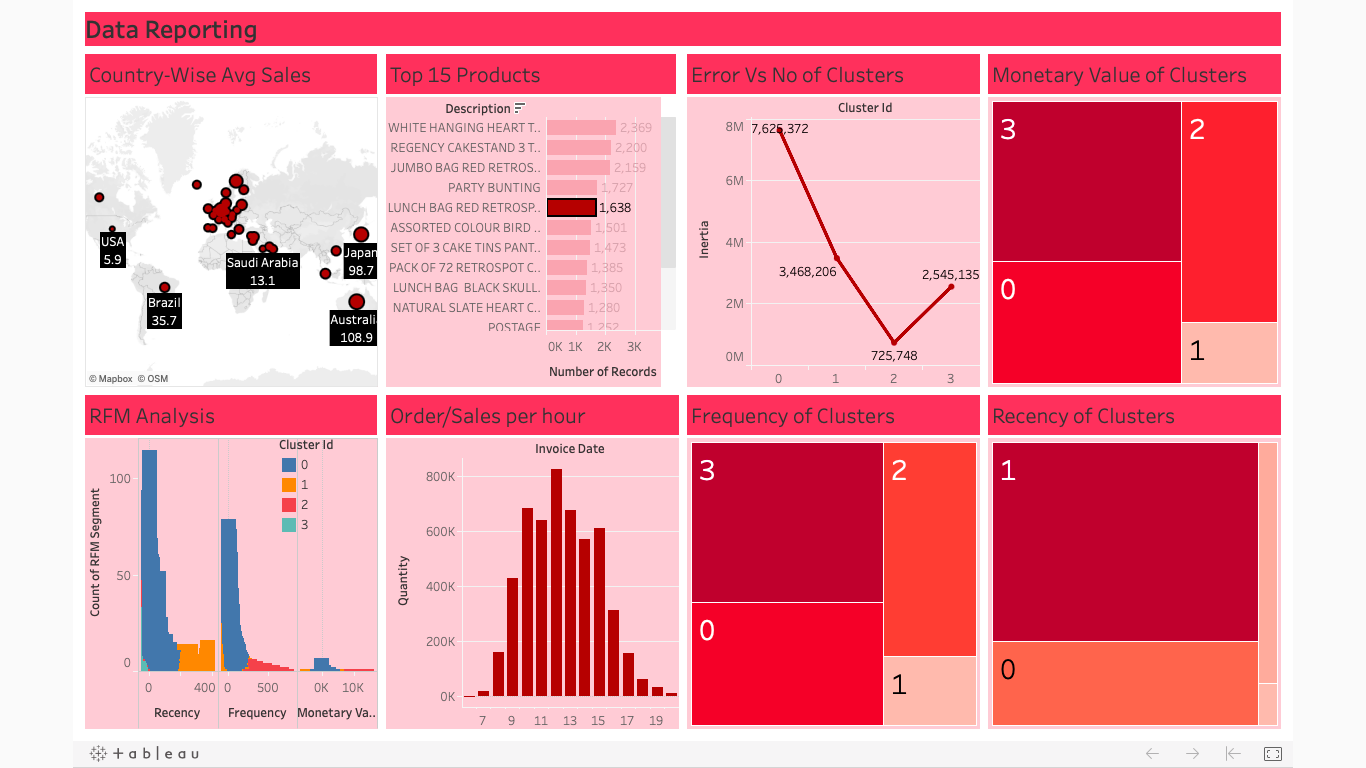

[Link to the Tableau Worksheet](https://public.tableau.com/views/CustomerSegmentation-DSCapstoneProject/Dashboard1?:language=en&:display_count=y&publish=yes&:origin=viz_share_link)